In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
electric_population = pd.read_csv('../data/electric_vehicle_population.csv')

In [3]:
electric_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223992 entries, 0 to 223991
Data columns (total 14 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             223992 non-null  object 
 1   City                                               223992 non-null  object 
 2   State                                              223992 non-null  object 
 3   Postal Code                                        223992 non-null  int64  
 4   Model Year                                         223992 non-null  int64  
 5   Make                                               223992 non-null  object 
 6   Model                                              223992 non-null  object 
 7   Electric Vehicle Type                              223992 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  223992 non-null  object

In [4]:
fuel_stations = pd.read_csv('../data/alt_fuel_stations.csv')
fuel_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fuel Type Code               56800 non-null  object 
 1   Station Name                 56800 non-null  object 
 2   Street Address               56798 non-null  object 
 3   Intersection Directions      4826 non-null   object 
 4   City                         56800 non-null  object 
 5   State                        56800 non-null  object 
 6   ZIP                          56800 non-null  object 
 7   Status Code                  56800 non-null  object 
 8   Expected Date                376 non-null    object 
 9   Groups With Access Code      56800 non-null  object 
 10  Access Days Time             53245 non-null  object 
 11  Cards Accepted               9012 non-null   object 
 12  BD Blends                    726 non-null    object 
 13  EV Level 1 EVSE 

C:\Users\juan_\AppData\Local\Temp\ipykernel_41588\967235813.py:1: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_stations = pd.read_csv('../data/alt_fuel_stations.csv')


In [5]:
count_models = electric_population['Model'].value_counts()
count_models.head(180)
#there are 164 models

Model
MODEL Y        46583
MODEL 3        34461
LEAF           13735
MODEL S         7765
BOLT EV         7008
               ...  
REVUELTO           2
918                1
MIRAI              1
FLYING SPUR        1
SIERRA EV          1
Name: count, Length: 164, dtype: int64

In [6]:
ev_vehicles_WA = electric_population[electric_population['State'] == 'WA']
ev_vehicles_WA

County              City State  Postal Code  Model Year       Make  \
0          Kitsap           Poulsbo    WA        98370        2023       JEEP   
1       Snohomish      Lake Stevens    WA        98258        2019  CHEVROLET   
2            King           Seattle    WA        98116        2015        BMW   
3            King           Seattle    WA        98178        2019      TESLA   
4          Yakima             Selah    WA        98942        2015      TESLA   
...           ...               ...   ...          ...         ...        ...   
223987     Pierce          Puyallup    WA        98374        2024      TESLA   
223988  Snohomish      Lake Stevens    WA        98258        2021        BMW   
223989     Pierce  University Place    WA        98466        2011     NISSAN   
223990     Pierce          Puyallup    WA        98374        2024      TESLA   
223991       King       Woodinville    WA        98072        2019        BMW   

           Model                   Electric Vehicle Type  \
0       WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1        BOLT EV          Battery Electric Vehicle (BEV)   
2             I3          Battery Electric Vehicle (BEV)   
3        MODEL 3          Battery Electric Vehicle (BEV)   
4        MODEL S          Battery Electric Vehicle (BEV)   
...          ...                                     ...   
223987   MODEL Y          Battery Electric Vehicle (BEV)   
223988        I3          Battery Electric Vehicle (BEV)   
223989      LEAF          Battery Electric Vehicle (BEV)   
223990   MODEL 3          Battery Electric Vehicle (BEV)   
223991        I3  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                   Not eligible due to low battery range            21.0   
1                 Clean Alternative Fuel Vehicle Eligible           238.0   
2                 Clean Alternative Fuel Vehicle Eligible            81.0   
3                 Clean Alternative Fuel Vehicle Eligible           220.0   
4                 Clean Alternative Fuel Vehicle Eligible           208.0   
...                                                   ...             ...   
223987  Eligibility unknown as battery range has not b...             0.0   
223988  Eligibility unknown as battery range has not b...             0.0   
223989            Clean Alternative Fuel Vehicle Eligible            73.0   
223990  Eligibility unknown as battery range has not b...             0.0   
223991            Clean Alternative Fuel Vehicle Eligible           126.0   

        Base MSRP  Legislative District             Vehicle Location  \
0             0.0                  23.0  POINT (-122.64681 47.73689)   
1             0.0                  44.0  POINT (-122.06402 48.01497)   
2             0.0                  34.0  POINT (-122.41067 47.57894)   
3             0.0                  37.0  POINT (-122.23825 47.49461)   
4             0.0                  15.0  POINT (-120.53145 46.65405)   
...           ...                   ...                          ...   
223987        0.0                   2.0  POINT (-122.27575 47.13959)   
223988        0.0                  44.0  POINT (-122.06402 48.01497)   
223989        0.0                  28.0  POINT (-122.53756 47.23165)   
223990        0.0                  25.0  POINT (-122.27575 47.13959)   
223991        0.0                  45.0  POINT (-122.15545 47.75448)   

                                         Electric Utility  
0                                  PUGET SOUND ENERGY INC  
1                                  PUGET SOUND ENERGY INC  
2            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
3            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
4                                              PACIFICORP  
...                                                   ...  
223987      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
223988                             PUGET SOUND 

In [7]:
ev_count_by_city = ev_vehicles_WA.groupby(['City'])['Model'].count().reset_index()
ev_count_by_city.rename(columns={'Model': 'EV_Count'}, inplace=True)
ev_count_by_city.sort_values(by=['EV_Count'], ascending=False).head(20)

City  EV_Count
376        Seattle     35664
26        Bellevue     10966
448      Vancouver      8103
348        Redmond      7772
35         Bothell      7298
349         Renton      6463
197       Kirkland      6438
371      Sammamish      6290
296        Olympia      5419
420         Tacoma      4818
193           Kent      3824
404        Spokane      3710
27      Bellingham      3695
229       Lynnwood      3577
134        Everett      3394
186       Issaquah      3334
434        Tukwila      3243
475    Woodinville      2825
250  Mercer Island      2773
18          Auburn      2563

In [8]:
ev_stations = fuel_stations[fuel_stations['Fuel Type Code'] == 'ELEC'].copy()
ev_stations_WA_all = ev_stations[ev_stations['State'] == 'WA'].copy()
ev_stations_WA = ev_stations[
    (ev_stations['State'] == 'WA') & 
    (ev_stations['Groups With Access Code'].str.contains('public', case=False, na=False))
].copy()


In [9]:
count_stations = ev_stations_WA.groupby('State')['Station Name'].count().reset_index()


In [10]:
count_stations

State  Station Name
0    WA          1517

In [11]:
count_stations_all = ev_stations_WA_all.groupby('State')['Station Name'].count().reset_index()
count_stations_all

State  Station Name
0    WA          1686

In [12]:
stations_by_city = ev_stations_WA.groupby(['City'])['Station Name'].count().reset_index()
stations_by_city.rename(columns={'Station Name': 'Charging_Stations_Count'}, inplace=True)
stations_by_city.sort_values(by=['Charging_Stations_Count'], ascending=False).head(20)

City  Charging_Stations_Count
138        Seattle                      332
9         Bellevue                      170
157         Tacoma                       57
150        Spokane                       48
124         Renton                       45
165      Vancouver                       41
123        Redmond                       39
105        Olympia                       35
68        Kirkland                       35
62        Issaquah                       28
10      Bellingham                       24
80        Lynnwood                       24
50         Everett                       21
5           Auburn                       19
128     Ridgefield                       17
177         Yakima                       17
14         Bothell                       17
88   Mercer Island                       16
172      Wenatchee                       15
169    Walla Walla                       15

In [13]:
ev_summary = pd.merge(ev_count_by_city, stations_by_city, left_on=['City'], right_on=['City'], how='outer')

# Replace NaN with 0
ev_summary.fillna(0, inplace=True)
ev_summary

City  EV_Count  Charging_Stations_Count
0          Aberdeen     205.0                      2.0
1              Acme      11.0                      0.0
2              Addy       6.0                      0.0
3    Airway Heights      45.0                      1.0
4            Albion       1.0                      0.0
..              ...       ...                      ...
497    Yarrow Point     152.0                      0.0
498            Yelm     388.0                      0.0
499          Zillah      40.0                      2.0
500           pasco       0.0                      1.0
501         spokane       0.0                      1.0

[502 rows x 3 columns]

In [14]:
ev_summary.sort_values(by=['Charging_Stations_Count','Charging_Stations_Count'], ascending=False).head(20)

City  EV_Count  Charging_Stations_Count
391        Seattle   35664.0                    332.0
27        Bellevue   10966.0                    170.0
435         Tacoma    4818.0                     57.0
419        Spokane    3710.0                     48.0
359         Renton    6463.0                     45.0
463      Vancouver    8103.0                     41.0
358        Redmond    7772.0                     39.0
200       Kirkland    6438.0                     35.0
303        Olympia    5419.0                     35.0
189       Issaquah    3334.0                     28.0
28      Bellingham    3695.0                     24.0
233       Lynnwood    3577.0                     24.0
137        Everett    3394.0                     21.0
18          Auburn    2563.0                     19.0
36         Bothell    7298.0                     17.0
365     Ridgefield    1197.0                     17.0
496         Yakima     929.0                     17.0
255  Mercer Island    2773.0                     16.0
472    Walla Walla     469.0                     15.0
481      Wenatchee     565.0                     15.0

In [15]:
top_ev_cities = ev_summary.sort_values(by='EV_Count', ascending=False).head(10)
top_stations_cities = ev_summary.sort_values(by='Charging_Stations_Count', ascending=False).head(10)

In [16]:
ev_summary['EV_per_Station'] = ev_summary['EV_Count'] / ev_summary['Charging_Stations_Count']
ev_summary.replace([float('inf'), float('-inf')], 0, inplace=True)  # Reemplazar infinitos si hay ciudades sin estaciones

In [75]:
ev_summary.sort_values(by=['Charging_Stations_Count','EV_per_Station'], ascending=False).head(20)

City  EV_Count  Charging_Stations_Count  EV_per_Station
391        Seattle   35664.0                    332.0      107.421687
27        Bellevue   10966.0                    170.0       64.505882
435         Tacoma    4818.0                     57.0       84.526316
419        Spokane    3710.0                     48.0       77.291667
359         Renton    6463.0                     45.0      143.622222
463      Vancouver    8103.0                     41.0      197.634146
358        Redmond    7772.0                     39.0      199.282051
200       Kirkland    6438.0                     35.0      183.942857
303        Olympia    5419.0                     35.0      154.828571
189       Issaquah    3334.0                     28.0      119.071429
28      Bellingham    3695.0                     24.0      153.958333
233       Lynnwood    3577.0                     24.0      149.041667
137        Everett    3394.0                     21.0      161.619048
18          Auburn    2563.0                     19.0      134.894737
36         Bothell    7298.0                     17.0      429.294118
365     Ridgefield    1197.0                     17.0       70.411765
496         Yakima     929.0                     17.0       54.647059
255  Mercer Island    2773.0                     16.0      173.312500
481      Wenatchee     565.0                     15.0       37.666667
472    Walla Walla     469.0                     15.0       31.266667

In [91]:
ev_summary.sort_values(by=['Charging_Stations_Count','EV_per_Station'], ascending=False).tail(400)

City  EV_Count  Charging_Stations_Count  EV_per_Station
310      Oroville      26.0                      2.0            13.0
280      Neah Bay       9.0                      2.0             4.5
263       Moclips       7.0                      2.0             3.5
226         Lopez       0.0                      2.0             0.0
382       SPOKANE       0.0                      2.0             0.0
..            ...       ...                      ...             ...
493       Woodway     109.0                      0.0             0.0
494          Wrch       2.0                      0.0             0.0
495        Yacolt      67.0                      0.0             0.0
497  Yarrow Point     152.0                      0.0             0.0
498          Yelm     388.0                      0.0             0.0

[400 rows x 4 columns]

**1.Where is the highest concentration of electric vehicles (EV) and charging stations?**

In [19]:
import folium
from folium.plugins import HeatMap

# Group EVs by ZIP Code
ev_density = ev_vehicles_WA.groupby('Postal Code').size().reset_index(name='EV Count')

# Group charging stations by ZIP Code
stations_density = ev_stations_WA.groupby('ZIP').size().reset_index(name='Charging Stations')

In [20]:
import geopandas as gpd
import re

# Function to extract latitude and longitude safely from "Vehicle Location"
def extract_coordinates(point_str):
    if isinstance(point_str, str):  # Ensure it's a string before applying regex
        match = re.search(r'POINT \(([-\d\.]+) ([-\d\.]+)\)', point_str)
        if match:
            lon, lat = map(float, match.groups())  # Convert to float
            return lat, lon  # Return as (Latitude, Longitude)
    return None, None  # Return None for missing values

# Convert "Vehicle Location" to string to avoid TypeError
ev_vehicles_WA.loc[:, 'Vehicle Location'] = ev_vehicles_WA['Vehicle Location'].astype(str)

# Apply function to extract coordinates safely
ev_vehicles_WA[['Latitude', 'Longitude']] = ev_vehicles_WA['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))

# Drop rows where coordinates couldn't be extracted
ev_vehicles_WA = ev_vehicles_WA.dropna(subset=['Latitude', 'Longitude']).copy()

C:\Users\juan_\AppData\Local\Temp\ipykernel_41588\3894765107.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_vehicles_WA[['Latitude', 'Longitude']] = ev_vehicles_WA['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))
C:\Users\juan_\AppData\Local\Temp\ipykernel_41588\3894765107.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_vehicles_WA[['Latitude', 'Longitude']] = ev_vehicles_WA['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))


In [21]:
from folium.plugins import HeatMap

# Create a base map centered in Washington (WA)
wa_map = folium.Map(location=[47.5, -120], zoom_start=7)

# Add EV vehicle heatmap (density of registered EVs)
HeatMap(data=ev_vehicles_WA[['Latitude', 'Longitude']].values, radius=10, name='EV Density').add_to(wa_map)

# Add charging station heatmap (density of charging points)
HeatMap(data=ev_stations_WA[['Latitude', 'Longitude']].values, radius=15, name='Charging Stations').add_to(wa_map)

# Add layer control
folium.LayerControl().add_to(wa_map)

# Display map
wa_map

# Red areas = High EV concentration Blue/green areas = Low EV concentration Purple/yellow areas = Charging station density

In [22]:
# Group by city and calculate EV density & charging station density
ev_per_city = ev_vehicles_WA.groupby('City').size().reset_index(name='EV_Count')
stations_per_city = ev_stations_WA.groupby('City').size().reset_index(name='Charging_Stations')

# Merge both datasets
city_analysis = pd.merge(ev_per_city, stations_per_city, on='City', how='left').fillna(0)

# Calculate EV per charging station ratio
# Evitar división por cero antes de calcular la razón
city_analysis['EV_per_Station'] = city_analysis['EV_Count'] / city_analysis['Charging_Stations'].replace(0, np.nan)

# Reemplazar valores infinitos con el conteo de EV correspondiente
city_analysis.loc[city_analysis['EV_per_Station'] == float('inf'), 'EV_per_Station'] = city_analysis['EV_Count']

# Find areas with the highest deficit (high EV count but few stations)
top_deficit_areas = city_analysis.sort_values(by='EV_per_Station', ascending=False).head(10)
top_deficit_areas

City  EV_Count  Charging_Stations  EV_per_Station
236  Maple Valley      1940                1.0     1940.000000
275     Newcastle      1133                1.0     1133.000000
52          Camas      1992                2.0      996.000000
205  Lake Stevens      1891                2.0      945.500000
371     Sammamish      6290                8.0      786.250000
450        Vashon       744                1.0      744.000000
394    Snoqualmie      1099                2.0      549.500000
141      Ferndale       488                1.0      488.000000
386     Shoreline      2424                5.0      484.800000
329  Port Orchard      1417                3.0      472.333333

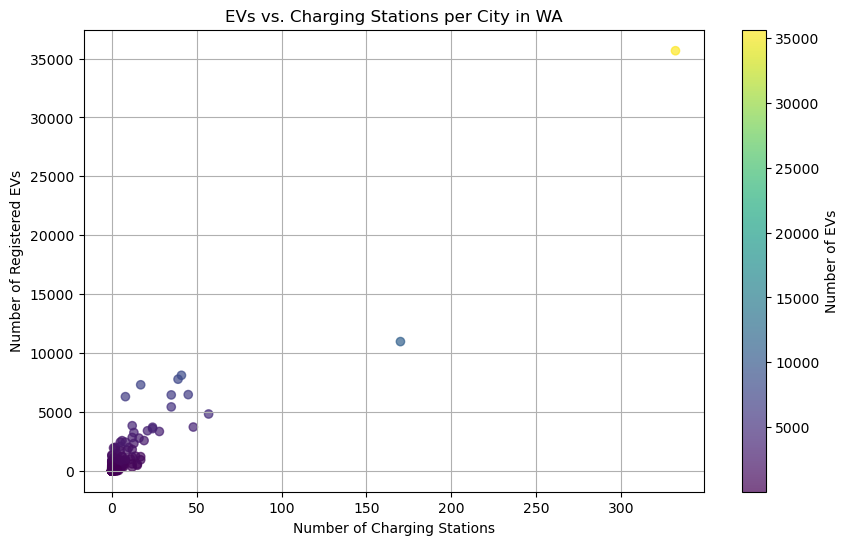

In [23]:
import matplotlib.pyplot as plt

# Scatter plot: Number of EVs vs. Number of Charging Stations

plt.figure(figsize=(10, 6))
plt.scatter(
    city_analysis['Charging_Stations'],
    city_analysis['EV_Count'],
    c=city_analysis['EV_Count'],  # Usamos la cantidad de EVs para definir el color
    cmap='viridis',  # Puedes probar otros como 'plasma', 'coolwarm', etc.
    alpha=0.7
)
plt.colorbar(label="Number of EVs")  # Agregar barra de colores
plt.xlabel("Number of Charging Stations")
plt.ylabel("Number of Registered EVs")
plt.title("EVs vs. Charging Stations per City in WA")
plt.grid()
plt.show()

**2.Which areas have the biggest charging infrastructure deficit or saturation?**

In [25]:
ev_stations_WA.columns = ev_stations_WA.columns.str.strip()
ev_stations_WA['EV Level 1 EVSE']

2348      NaN
2431     36.0
2880      2.0
2975      1.0
2976      NaN
         ... 
56575     NaN
56611     NaN
56646     NaN
56717     NaN
56750     NaN
Name: EV Level 1 EVSE, Length: 1517, dtype: float64

In [26]:
ev_stations_WA['EV Level 2 EVSE']

2348     4.0
2431     NaN
2880     NaN
2975     2.0
2976     1.0
        ... 
56575    1.0
56611    NaN
56646    2.0
56717    NaN
56750    2.0
Name: EV Level 2 EVSE, Length: 1517, dtype: float64

In [27]:
ev_stations_WA['EV DC Fast Count']

2348     NaN
2431     NaN
2880     NaN
2975     NaN
2976     NaN
        ... 
56575    NaN
56611    1.0
56646    NaN
56717    2.0
56750    NaN
Name: EV DC Fast Count, Length: 1517, dtype: float64

In [28]:

ev_stations_WA['EV Level 1 EVSE'] = pd.to_numeric(ev_stations_WA['EV Level 1 EVSE'], errors='coerce').fillna(0)
ev_stations_WA['EV Level 2 EVSE'] = pd.to_numeric(ev_stations_WA['EV Level 2 EVSE'], errors='coerce').fillna(0)
ev_stations_WA['EV DC Fast Count'] = pd.to_numeric(ev_stations_WA['EV DC Fast Count'], errors='coerce').fillna(0)
# Calculate the total number of chargers per ZIP code
ev_stations_WA['Total Chargers'] = ev_stations_WA['EV Level 1 EVSE'] + ev_stations_WA['EV Level 2 EVSE'] + ev_stations_WA['EV DC Fast Count']

# Aggregate total chargers per ZIP
chargers_per_zip = ev_stations_WA.groupby('ZIP')['Total Chargers'].sum().reset_index()

# Merge with EV density data
ev_charger_ratio = ev_density.merge(chargers_per_zip, left_on='Postal Code', right_on='ZIP', how='left')
ev_charger_ratio['EV per Charger'] = ev_charger_ratio['EV Count'] / ev_charger_ratio['Total Chargers']
ev_charger_ratio.fillna(0, inplace=True)

C:\Users\juan_\AppData\Local\Temp\ipykernel_41588\1261219186.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ev_charger_ratio.fillna(0, inplace=True)


In [29]:
ev_stations_WA['Total Chargers']

2348      4.0
2431     36.0
2880      2.0
2975      3.0
2976      1.0
         ... 
56575     1.0
56611     1.0
56646     2.0
56717     2.0
56750     2.0
Name: Total Chargers, Length: 1517, dtype: float64

In [30]:
chargers_per_zip

ZIP  Total Chargers
0    98001            16.0
1    98002            14.0
2    98003             8.0
3    98004            95.0
4    98005            25.0
..     ...             ...
415  99324             2.0
416  99326             1.0
417  99328             5.0
418  99352             3.0
419  99362             8.0

[420 rows x 2 columns]

In [31]:
ev_stations_WA['Total Chargers']

2348      4.0
2431     36.0
2880      2.0
2975      3.0
2976      1.0
         ... 
56575     1.0
56611     1.0
56646     2.0
56717     2.0
56750     2.0
Name: Total Chargers, Length: 1517, dtype: float64

In [32]:
ev_charger_ratio

Postal Code  EV Count    ZIP  Total Chargers  EV per Charger
0         98001       980  98001            16.0       61.250000
1         98002       375  98002            14.0       26.785714
2         98003       759  98003             8.0       94.875000
3         98004      3289  98004            95.0       34.621053
4         98005      1645  98005            25.0       65.800000
..          ...       ...    ...             ...             ...
561       99361        13  99361             1.0       13.000000
562       99362       472  99362            19.0       24.842105
563       99371         1      0             0.0        0.000000
564       99402        12      0             0.0        0.000000
565       99403        78  99403             2.0       39.000000

[566 rows x 5 columns]

**How does EV distribution correlate with charging infrastructure in different cities?**

In [34]:
ev_per_city = ev_vehicles_WA.groupby('City').size().reset_index(name='EV Count')
stations_per_city = ev_stations_WA.groupby('City').size().reset_index(name='Charging Stations')

# Merge datasets
city_comparison = ev_per_city.merge(stations_per_city, on='City', how='left').fillna(0)
city_comparison

City  EV Count  Charging Stations
0          Aberdeen       205                2.0
1              Acme        11                0.0
2              Addy         6                0.0
3    Airway Heights        45                1.0
4            Albion         1                0.0
..              ...       ...                ...
479          Yacolt        67                0.0
480          Yakima       929               17.0
481    Yarrow Point       152                0.0
482            Yelm       388                0.0
483          Zillah        40                2.0

[484 rows x 3 columns]

**Where should charging infrastructure be expanded?**

In [36]:
# Assuming we have data across multiple years
ev_growth = ev_vehicles_WA.groupby(['City', 'Model Year']).size().reset_index(name='EV Count')

# Compute annual growth rate
ev_growth['Growth Rate'] = ev_growth.groupby('City')['EV Count'].pct_change()
ev_growth.fillna(0, inplace=True)

In [37]:
# Merge EV growth with charging station data
high_growth_low_chargers = ev_growth.merge(stations_per_city, on='City', how='left')

# Filter cities with high EV growth but low charging stations
high_growth_low_chargers = high_growth_low_chargers[(high_growth_low_chargers['Growth Rate'] > 0.1) & 
                                                     (high_growth_low_chargers['Charging Stations'] < 5)]
# Sort by highest growth rate
high_growth_low_chargers.sort_values(by='Growth Rate', ascending=False, inplace=True)

# Display high-priority cities
print(high_growth_low_chargers[['City', 'Growth Rate', 'Charging Stations']])

              City  Growth Rate  Charging Stations
993     Des Moines    17.000000                4.0
3621    Snoqualmie    17.000000                2.0
296         Blaine    15.000000                4.0
3027  Port Orchard    12.000000                3.0
825       Concrete     7.000000                1.0
...            ...          ...                ...
629       Chehalis     0.111111                1.0
507          Camas     0.108108                2.0
1002    Des Moines     0.100000                4.0
1148    Ellensburg     0.100000                4.0
3777    Steilacoom     0.100000                1.0

[598 rows x 3 columns]


**Porcentage Goverment Stations**

**Number of diferent Type of Stations**